<a href="https://colab.research.google.com/github/SalahKhattab74/Natural-Language-Processing/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [4]:
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v


Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 34.4MB/s]


In [5]:
with open("/content/sarcasm.json",'r') as f : 
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [8]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]



In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [11]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)


Epoch 1/30
625/625 - 3s - loss: 0.5865 - accuracy: 0.6777 - val_loss: 0.4086 - val_accuracy: 0.8325 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 2s - loss: 0.3210 - accuracy: 0.8681 - val_loss: 0.3449 - val_accuracy: 0.8554 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 2s - loss: 0.2407 - accuracy: 0.9057 - val_loss: 0.3427 - val_accuracy: 0.8512 - 2s/epoch - 4ms/step
Epoch 4/30
625/625 - 2s - loss: 0.1947 - accuracy: 0.9250 - val_loss: 0.3549 - val_accuracy: 0.8538 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 3s - loss: 0.1629 - accuracy: 0.9398 - val_loss: 0.3806 - val_accuracy: 0.8492 - 3s/epoch - 4ms/step
Epoch 6/30
625/625 - 5s - loss: 0.1376 - accuracy: 0.9510 - val_loss: 0.4302 - val_accuracy: 0.8375 - 5s/epoch - 7ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1186 - accuracy: 0.9593 - val_loss: 0.4436 - val_accuracy: 0.8438 - 3s/epoch - 5ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1023 - accuracy: 0.9650 - val_loss: 0.4820 - val_accuracy: 0.8411 - 2s/epoch - 4ms/step
Epoch 9/30
625/625 - 2s 

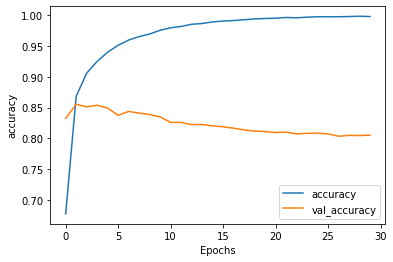

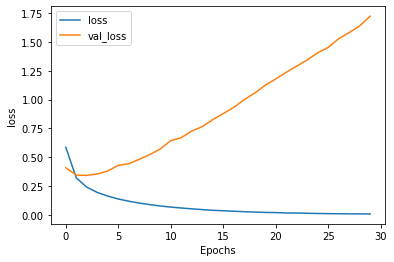

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
